# Test kwartiel 2: een parachutesprong analyseren

# Context

Parachutisten gebruiken een hoogtemeter  tijdens een sprong. Deze hoogtemeter wordt aan de pols gedragen tijdens de sprong en berekent de hoogte van de parachutist op basis van een drukmeting. Op deze manier weet de parachutist wanneer hij zijn parachute op een veilige hoogte moet openen.

![title](Images/Hoogtemeter_analoog.jpg)
![title](Images/Hoogtemeter_digitaal.jpg)
![title](Images/Parachute_VLS.jpg)

Er bestaan analoge (linkse figuur) en digitale (middenste figuur) hoogtemeters. Het voordeel van een analoge hoogtemeter is dat die zonder een batterij werkt en dus niet zomaar uit kan vallen. Een digitale meter slaat alle data op zodat je de sprong achteraf kan analyseren. Dit past perfect binnen de opzet van MOEF en gaan we in deze examenopgave doen. 

Om een goede vergelijking van meetdata en de modellen uit de fysica te kunnen doen, geven we jullie eerst de wetten die van toepassing zijn op een parachutesprong. Er zijn twee krachten die op de parachutist werken: de zwaartekracht en de luchtweerstand. Dit weten jullie normaal gezien al vanuit de lessen fysica/mechanica en onderstaande formules zouden ook bekend voor moeten komen:

&nbsp; &nbsp; &nbsp; &nbsp; $F_g = m \cdot g$ &nbsp;  &nbsp; en &nbsp; &nbsp; $ F_d = \frac{1}{2} \rho v^2 C_D A $

Met: <br>
&nbsp; $F_g =$ de zwaartekracht <br>
&nbsp; $ m =$ de massa van het vallend voorwerp <br>
&nbsp; $ g =$ de valversnelling <br>
&nbsp; $ F_d =$ de luchtweerstand (d van drag) <br>
&nbsp; $ \rho =$ de massadichtheid van lucht <br>
&nbsp; $ C_D =$ de dimensieloze weerstandcoëfficiënt. Voor een parachutist is dit bij benadering 1,1 <br>
&nbsp; $ A =$ de geprojecteerde oppervlakte, loodrecht op de bewegingsrichting. Voor een parachutist die horizontaal een vrije val uitvoert is dit bij benadering 0,45 m² <br>

In dit deel van de test gaan jullie de **meetdata van een digitale hoogtemeter analyseren**. 
Je **moet** hierbij een aantal keren een functie uit de bibliotheek **slimmeFuncties.py** gebruiken. 

We doen dit deel van de test bewust op Jupyterhub zodat je alle bestanden van je jupyterhub-omgeving kan gebruiken (en dus ook je oplossing van de werkzittingen). Alle andere individuele hulpmiddelen, zoals Python-tutorials opzoeken en zelfs genAI zijn ook toegestaan, maar we zijn ervan overtuigd dat het onoordeelkundig gebruik van die hulpmiddelen jullie vooral veel kostbare tijd zal kosten. We hebben ook zelf getest in copilot en de resultaten waren traag en zeer variabel van kwaliteit. Communicatie met elkaar is sowieso verboden, en we loggen hiervoor ook alle netwerkverkeer.

**Het is belangrijk dat je dit deel van de test op de juiste manier indient. De instructies hiervoor staan op het einde van deze test (helemaal onderaan dus) en op de afgedrukte versie die je op papier hebt gekregen.**
  
We beginnen uiteraard met het importeren van enkele bibliotheken en het inlezen van de meetdata:

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
from slimmeFuncties import * 
from qgridnext import show_grid

In [2]:
dfParachuteOrigineel = pd.read_csv("Parachute_SprongOrigineel.csv", sep=";",encoding="latin-1")

show_grid(dfParachuteOrigineel)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…


### Opdracht 1


Vervolledig onderstaande functie zodat de **hoogte van de parachutist in functie van de tijd** wordt geplot.

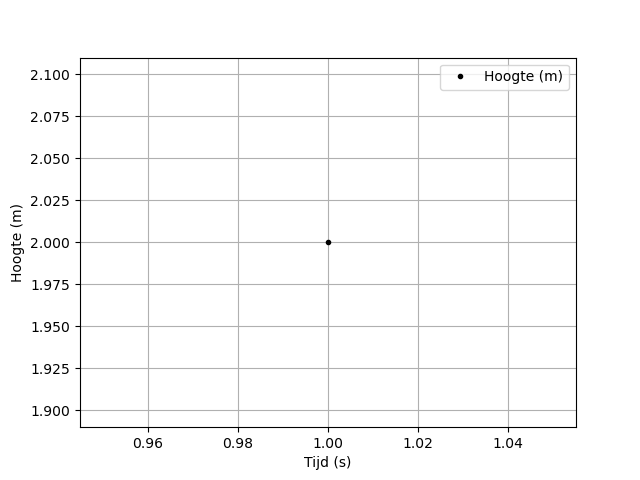

In [3]:
def plotSprong(df, yData = "Hoogte (m)"):
    # TODO 1: vul aan
    xAs = 1  #TODO
    yAs = 2  #TODO
    plt.figure()
    plt.plot(xAs,yAs, color="black",marker='.',linestyle='', label=yData)
    plt.legend()
    plt.xlabel("Tijd (s)")
    plt.ylabel(yData)
    plt.grid()
    plt.show()
    
plotSprong(dfParachuteOrigineel) 

### Opdracht 2 


Bovenstaande data bevat behoorlijk wat ruis. Gebruik een **slimme functie** uit de bibliotheek slimmeFuncties.py om deze **ruis visueel te verminderen**. Leg ook uit waarom je, voor de parameters van die slimme functie, jouw gekozen waarden gebruikt. 

Gebruik vervolgens de functie **plotSprong** uit opdracht 1 om het resultaat te controleren.

In [4]:
# Schrijf hieronder je code en leg uit waarom je die waarden voor de parameters gekozen hebt.




### Intermezzo
Ruis visueel wegfilteren is behoorlijk goed te doen maar als we _mooie_ berekeningen willen maken, moet de data nog beter opgeschoond worden. Dit is gedaan in een apart csv-bestand dat we hieronder inlezen en waarmee we vanaf nu verder zullen rekenen.

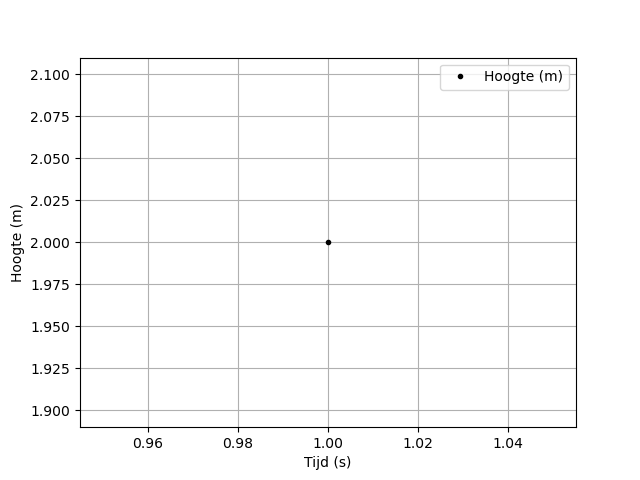

In [5]:
dfParachute = pd.read_csv("Parachute_SprongZonderRuis.csv", sep=";",encoding="latin-1")

plotSprong(dfParachute)

Als je de data zonder ruis in detail wil bekijken, kan je de volgende codecel uitvoeren.

In [6]:
show_grid(dfParachute)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Opdracht 3 



De functie berekenSnelheid (gedefinieerd in onderstaand codeblok) voegt een kolom toe aan een dataframe. We hebben hieronder deze functie toegepast op de meetdata van de parachutesprong en zo het dataframe dfParachute uitgebreid. De namen van de variabelen getal1 en getal2 hebben géén betekenis, maar toch zijn ze belangrijk in de berekening. **Leg uit** waar de variabelen voor staan en welke formule toegepast wordt.



In de nieuwe kolom wordt eerst de eerste rij op 0 gezet. Daarna is er een for-lus. **Leg uit** waarom de grenzen van de lijst in de for-lus op deze manier gekozen zijn.


In [7]:
def berekenSnelheid(dataFrame):
    dataFrame.loc[0,"Snelheid (m/s)"]=0
    for i in range(1,len(dataFrame)):
        getal1 = dataFrame.loc[i,"Hoogte (m)"] - dataFrame.loc[i-1,"Hoogte (m)"]
        getal2 = dataFrame.loc[i,"Tijd (s)"] - dataFrame.loc[i-1,"Tijd (s)"]
        dataFrame.loc[i,"Snelheid (m/s)"]= getal1 / getal2
    return dataFrame

berekenSnelheid(dfParachute)



,Tijd (s),Hoogte (m),Snelheid (m/s)
0,-10.0,3450.000000,0.000000
1,-9.8,3450.023271,0.116355
2,-9.6,3450.049338,0.130335
3,-9.4,3450.077602,0.141320
4,-9.2,3450.107356,0.148770
...,...,...,...
2046,399.2,6.193285,-0.029905
2047,399.4,6.187654,-0.028156
2048,399.6,6.182787,-0.024333
2049,399.8,6.178995,-0.018960


#### Oplossing opdracht 3

[schrijf hier je oplossing = dubbelklik en typ je oplossing]


### Opdracht 4


Pas de code van opdracht 1 aan om één grafiek te maken met **2 verticale assen**. Op de **linkeras** plot je de hoogte in functie van de tijd zoals bij opdracht 1, op de **rechteras** plot je de **grootte** van de snelheid in functie van de tijd. 

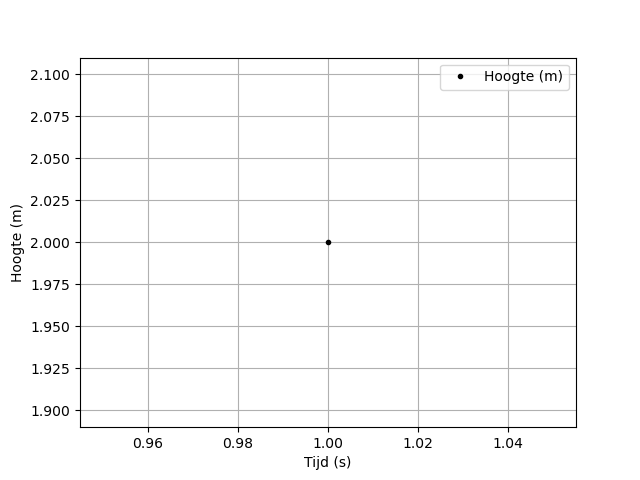

In [8]:
def plotHoogteEnSnelheid(df):
    # je kan hier eventueel de code van opdracht 1 inplakken en die aanpassen 
    # of je kan vertrekken van een oefening uit de werkzittingen van MOEF en/of PIT
    plt.show()


plotHoogteEnSnelheid(dfParachute) 

### Opdracht 5


Beschrijf de plot die je zonet hebt gemaakt.
* Welke fasen van de sprong zie je in de plot?
* Zie je een link met de formules uit de fysica/mechanica?

_Opmerking:  Is het bij opdracht 4 niet gelukt om de plot te maken? Bedenk dan een andere manier om toch zicht te krijgen op de hoogte en de snelheid tijdens de sprong._

#### Oplossing opdracht 5

[schrijf hier je oplossing = dubbelklik en typ je oplossing]

### Opdracht 6


De snelheid evolueert 2 keert naar ongeveer een stationaire (=constante) snelheid. Waaraan is de versnelling op dat moment gelijk? Wat wil dit zeggen over de krachten die in het spel zijn? Is dit logisch op basis van het fysicamodel? Verwijs naar de 2e wet van Newton!

#### Oplossing opdracht 6

[schrijf hier je oplossing = dubbelklik en typ je oplossing]




### Opdracht 7


Gebruik een functie uit de bibliotheek slimmeFuncties.py om het **snelheidsplateau** tijdens de vrije val van de parachutist uit de meetdata te **selecteren**. Schrijf de code zo algemeen mogelijk zodat deze ook toepasbaar is op toekomstige parachutesprongen.

Bepaal vervolgens de waarde van die stationaire snelheid **tot op het juiste aantal beduidende cijfers**. Wij hebben al de code geschreven om de stationaire snelheid netjes op het scherm te laten zien.

In [9]:
# Eventuele tussenstappen moet je zelfstandig uitvoeren. Sla de meetdata van het snelheidsplateau
# op in een dataframe met de naam dfSnelheidsplateau


dfSnelheidsplateau = 3  #TODO
snelheidPlateau = 1000  #TODO
# Hieronder het gegeven print-commando
print('De stationaire snelheid op het einde van de vrijevalbeweging = ', snelheidPlateau, ' m/s.')

De stationaire snelheid op het einde van de vrijevalbeweging =  1000  m/s.


### Opdracht 8


Bepaal het tijdstip waarop de parachute geopend wordt. Schrijf deze code opnieuw zo algemeen mogelijk.

In [10]:
# Schrijf hier je code


### Opdracht 9 


Bereken de oppervlakte van de parachute. Deze sprong werd uitgevoerd door een man van 75,4 kg. 
**Print daarna** deze oppervlakte met een **netjes afgewerkte zin** op het scherm.


In [11]:
# Schrijf hieronder je code (dit zou je langste stukje zelfgemaakte code moeten zijn maar het kan 
# nog altijd in minder dan 10 regels code opgelost worden)


## BONUSopdracht om excellentie aan te moedigen.
> ##### Als je MINSTENS 14/20 op het voorgaande deel hebt, kan je met deze vraag nog twéé (2) BONUSpunten verdienen. Je kan hierdoor op dit deel tot 22/20 halen wat dan opgeteld wordt bij het deel van de test dat je zonet op papier hebt gemaakt. In het totaal kan je wel niet boven de 20/20 komen voor het geheel van de test, waarbij we de punten van de 2 delen optellen dus.

Bedenk nog een wetenschappelijk relevante waarde die je uit deze meetdata kan afleiden. 

Schrijf ook de code om dit te berekenen en/of te tekenen. 
Als randvoorwaarde ben je verplicht om **minstens 1 slimmeFunctie** te gebruiken.

In [12]:
# TODO Je bent hier dus volledig vrij!

### Klaar? Dien dan je opdracht op deze manier in!

* **Download** je notebook via File - Download.
* Ga naar je Downloads map en **hernoem** je notebook naar **NaamVoornaam (.ipynb)** waarbij je uiteraard je eigen Naam en Voornaam (met hoofdletters) invult. De extensie moet je waarschijnlijk niet zelf aanvullen.
* **Upload** je notebook in Toledo bij de opdracht 'Test kwartiel 2 - uploadzone'.
* Wij noteren het **tijdstip** waarop je het examenlokaal verlaat en controleren dat dit tijdstip later is dan het tijdstip waarop je het notebook indient.